# Bias of Poisson GLM with mixture‐Gaussian covariates
### 1. Estimating equation for the single-β fit

When you fit

$$
\log E[y_i\mid x_i] \;=\; b\,x_i
$$



by Poisson GLM (no intercept), the MLE $\hat b$ satisfies

$$
\sum_{i=1}^n x_i\,y_i
\;=\;
\sum_{i=1}^n x_i\,e^{\hat b\,x_i}
\quad\Longrightarrow\quad
\mathbb{E}[x\,y]
\;=\;
\mathbb{E}[\,x\,e^{\hat b\,x}\,].
$$

Since $y\mid x,\beta\sim\mathrm{Poisson}(e^{\beta x})$ and $x\sim\mathrm{Uniform}(-1,1)$, the left side is

$$
\mathbb{E}[x\,y]
=\mathbb{E}_x\bigl[x\,\mathbb{E}_\beta[e^{\beta x}]\bigr]
=\tfrac12\int_{-1}^1 x\,M_\beta(x)\,dx,
$$

where the mixture‐MGF is

$$
M_\beta(x)
=\mathbb{E}_\beta\bigl[e^{\beta x}\bigr]
=\sum_{k=1}^K\pi_k
\exp\!\Bigl(\mu_k\,x + \tfrac12\sigma_k^2\,x^2\Bigr).
$$

The right side is

$$
\mathbb{E}[x\,e^{\hat b\,x}]
=\tfrac12\int_{-1}^1 x\,e^{\hat b\,x}\,dx.
$$

Thus the estimating equation becomes

$$
\boxed{
\int_{-1}^1 x\,M_\beta(x)\,dx
\;=\;
\int_{-1}^1 x\,e^{\hat b\,x}\,dx.
}
$$

---

### 2. Small-variance expansion

Let

$$
\bar\beta = \sum_{k=1}^K\pi_k\,\mu_k,
\qquad
V = \sum_{k=1}^K\pi_k\bigl(\sigma_k^2 + \mu_k^2\bigr)\;-\;\bar\beta^2.
$$

For “small” $V$, expand

$$
M_\beta(x)
=\mathbb{E}\bigl[e^{(\beta-\bar\beta)x}\bigr]\,e^{\bar\beta x}
\approx \bigl(1 + \tfrac12\,V\,x^2\bigr)\,e^{\bar\beta x}.
$$

Likewise expand the right‐hand integral about $b=\bar\beta$.  Equating to first order in $V$ gives

$$
\hat b - \bar\beta
\;\approx\;
\frac{V}{2}\;\frac{\displaystyle\int_{-1}^1 x^3\,e^{\bar\beta\,x}\,dx}
                      {\displaystyle\int_{-1}^1 x^2\,e^{\bar\beta\,x}\,dx}.
$$

Define the moments

$$
M_2(\bar\beta)
=\int_{-1}^1 x^2\,e^{\bar\beta x}\,dx,
\quad
M_3(\bar\beta)
=\int_{-1}^1 x^3\,e^{\bar\beta x}\,dx,
$$

so that the leading‐order bias is

$$
\boxed{
\hat b
\;\approx\;
\bar\beta
\;+\;
\frac{V}{2}\,\frac{M_3(\bar\beta)}{M_2(\bar\beta)}.
}
$$

---

### 3. Closed-form for $M_2$ and $M_3$

One can show

$$
M_2(b)
=\frac{(b^2 - 2b + 2)\,e^b \;-\;(b^2 + 2b + 2)\,e^{-b}}{b^3},
$$

$$
M_3(b)
=\frac{(b^3 - 3b^2 + 6b - 6)\,e^b \;-\;(b^3 + 3b^2 + 6b - 6)\,e^{-b}}{b^4}.
$$

---

### 4. Practical recipe

1. **Compute**
   $\displaystyle
     \bar\beta=\sum_{k=1}^K\pi_k\,\mu_k,
     \quad
     V=\sum_{k=1}^K\pi_k\bigl(\sigma_k^2+\mu_k^2\bigr)-\bar\beta^2.
   $

2. **Evaluate**
   $\displaystyle
     M_2(\bar\beta),\quad M_3(\bar\beta)
   $
   via the formulas above.

3. **Plug in** to get the bias approximation

   $$
   \hat b - \bar\beta
   \;\approx\;
   \frac{V}{2}\,\frac{M_3(\bar\beta)}{M_2(\bar\beta)}.
   $$

   This gives you an analytic handle on how the mixture‐variance $V$ “pulls” the fitted $\hat b$ away from the true mean $\bar\beta$.


Here’s the analytic calculation of

$$
V \;=\;\frac1K\sum_{k=1}^K\bigl(\sigma_k^2+\mu_k^2\bigr)\;-\;\Bigl(\frac1K\sum_{k=1}^K\mu_k\Bigr)^{\!2}
$$

when

$$
\mu_k\sim N(2,\,3^2),
\quad
\sigma_k=|\;N(0,1)\;|
$$

independently for $k=1,\dots,K$, with $K=5$.

---

Here’s the analytic expectation of the mixture‐variance

$$
V \;=\;\frac{1}{K}\sum_{k=1}^K\bigl(\sigma_k^2+\mu_k^2\bigr)
\;-\;\Bigl(\frac{1}{K}\sum_{k=1}^K\mu_k\Bigr)^2
$$

when

$$
\mu_k\sim N(1.5,\,0.7^2),
\qquad
\sigma_k=|\!N(0,1)|\;\Longrightarrow\;\sigma_k^2\sim\chi^2_1
$$

and all $\mu_k,\sigma_k$ independent.

---

1. **Compute the pieces**

* $E[\sigma_k^2]=1$ (mean of $\chi^2_1$).
* $E[\mu_k]=1.5,\quad \mathrm{Var}(\mu_k)=0.7^2=0.49,\quad E[\mu_k^2]=\mathrm{Var}(\mu_k)+(E\mu_k)^2=0.49+2.25=2.74.$

2. **Expected first term**

$$
E\Bigl[\tfrac1K\sum(\sigma_k^2+\mu_k^2)\Bigr]
=E[\sigma_k^2]+E[\mu_k^2]
=1+2.74
=3.74.
$$

3. **Expected square of the mean**

$$
E\Bigl[\bigl(\tfrac1K\sum\mu_k\bigr)^{2}\Bigr]
=\mathrm{Var}\Bigl(\tfrac1K\sum\mu_k\Bigr)+(E\mu_k)^2
=\frac{0.49}{K}+2.25.
$$

4. **Subtract to get**

$$
E[V]
=3.74-\Bigl(\tfrac{0.49}{K}+2.25\Bigr)
=1.49-\frac{0.49}{K}.
$$

Equivalently,

$$
\boxed{%
  E[V]
  \;=\;
  1 + 0.49\Bigl(1-\tfrac1K\Bigr)
  \;=\;
  1.49-\frac{0.49}{K}.
}
$$

---

**Example.**  If $K=5$,

$$
E[V] = 1.49-\frac{0.49}{5}\approx1.392.
$$



In [4]:
import sympy as sp

# Define symbols
b = sp.symbols('b')
x = sp.symbols('x')

# Define integrals
M2 = sp.integrate(x**2 * sp.exp(b*x), (x, -1, 1))
M3 = sp.integrate(x**3 * sp.exp(b*x), (x, -1, 1))

# Simplify
M2_s = sp.simplify(M2)
M3_s = sp.simplify(M3)
M2_s, M3_s

(Piecewise(((-b**2 - 2*b + (b**2 - 2*b + 2)*exp(2*b) - 2)*exp(-b)/b**3, ((b > -oo) | (b > 0)) & ((b > -oo) | (b < oo)) & ((b > 0) | (b < 0)) & ((b < 0) | (b < oo))), (2/3, b >= 0)),
 Piecewise(((b**3 + 3*b**2 + 6*b + (b**3 - 3*b**2 + 6*b - 6)*exp(2*b) + 6)*exp(-b)/b**4, ((b > -oo) | (b > 0)) & ((b > -oo) | (b < oo)) & ((b > 0) | (b < 0)) & ((b < 0) | (b < oo))), (0, b >= 0)))

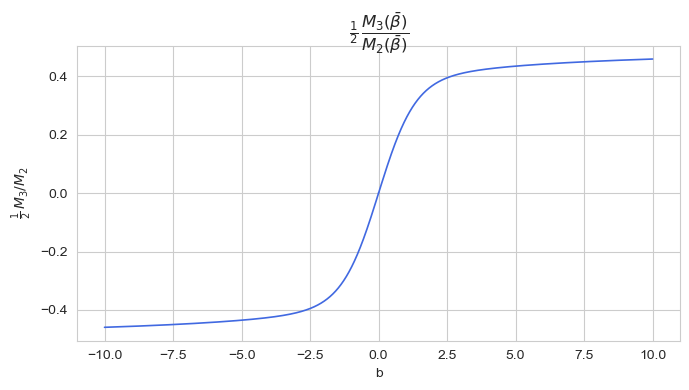

In [21]:
import numpy as np
import matplotlib.pyplot as plt
b_vals = np.arange(-10, 10.001, 0.001, dtype=float)   # 20 001 points
# -----------------------------------------------------------------------------
eps = 1e-12                       # tolerance to tag "zero"
mask0 = np.abs(b_vals) < eps      # boolean mask for b ≈ 0

b_safe = b_vals.copy()
b_safe[mask0] = np.nan
# prevent division-by-zero warning
M2_fn = sp.lambdify(b, M2_s, modules='numpy')
M3_fn = sp.lambdify(b, M3_s, modules='numpy')

M2 = M2_fn(b_safe)
M3 = M3_fn(b_safe)

V = 1.392
with np.errstate(divide="ignore", invalid="ignore"):
    ratio = 0.5 * M3 / M2          # element-wise
    ratio[~np.isfinite(ratio)] = np.nan   # replace inf / nan for cleaner plot

# ------------------------------------------------------------------
# 2) Plot ratio vs. b
# ------------------------------------------------------------------
plt.figure(figsize=(7, 4))
plt.plot(b_vals, ratio, lw=1.2, color="royalblue")

plt.title(r"$\frac{1}{2}\,\dfrac{M_3(\bar{\beta})}{M_2(\bar{\beta})}$")
plt.xlabel("b")
plt.ylabel(r"$\frac{1}{2}\,M_3/M_2$")
plt.grid(True)
plt.tight_layout()
plt.show()
# -----------------------------------------------------------------------------
# 4) quick sanity check
# -----------------------------------------------------------------------------



# --


In [20]:
import pandas as pd
df = pd.read_csv("results_exact_2025-06-14/poisson/beta_summary_stats.csv")
mean_mean_error = -df["mean_error"].mean(skipna=True)    # skipna=True ignores any NaNs
print(f"Mean of mean_error = {mean_mean_error:.6g}")

# where b is 1.5 find the ratio
b_target = 1.5
b_index = np.argmin(np.abs(b_vals - b_target))
ratio_at_b_target = ratio[b_index]
print(f"Estimated error at b = {b_target} is {1.392*ratio_at_b_target:.6g}")


Mean of mean_error = 0.524329
Estimated error at b = 1.5 is 0.45714
